## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [3]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Fri Jul 12 07:50:01 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.39       Driver Version: 430.39       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 107... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   61C    P8    11W /  N/A |    111MiB /  8192MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [5]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

x_train

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

In [12]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0712 07:51:24.491161   948 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [14]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0712 07:51:28.856455   948 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 07:51:28.890183   948 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [15]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0712 07:51:29.718997   948 deprecation.py:323] From C:\Users\jerry\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0712 07:51:29.983366   948 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 25s 490us/step - loss: 1.9329 - acc: 0.3007 - val_loss: 1.7608 - val_acc: 0.3725
Epoch 2/100
50000/50000 [==============================] - 21s 427us/step - loss: 1.7066 - acc: 0.3901 - val_loss: 1.6291 - val_acc: 0.4140
Epoch 3/100
50000/50000 [==============================] - 16s 312us/step - loss: 1.6132 - acc: 0.4248 - val_loss: 1.5587 - val_acc: 0.4492
Epoch 4/100
50000/50000 [==============================] - 16s 315us/step - loss: 1.5463 - acc: 0.4498 - val_loss: 1.5908 - val_acc: 0.4378
Epoch 5/100
50000/50000 [==============================] - 14s 281us/step - loss: 1.5010 - acc: 0.4645 - val_loss: 1.5632 - val_acc: 0.4378
Epoch 6/100
50000/50000 [==============================] - 14s 276us/step - loss: 1.4664 - acc: 0.4757 - val_loss: 1.4990 - val_acc: 0.4584
Epoch 7/100
50000/50000 [==============================] - 14s 279us/step - loss: 1.4356 - acc: 0.4845 - val_l

Epoch 59/100
50000/50000 [==============================] - 14s 280us/step - loss: 0.5469 - acc: 0.8037 - val_loss: 1.9662 - val_acc: 0.5103
Epoch 60/100
50000/50000 [==============================] - 14s 281us/step - loss: 0.5316 - acc: 0.8106 - val_loss: 2.0647 - val_acc: 0.5023
Epoch 61/100
50000/50000 [==============================] - 14s 280us/step - loss: 0.5165 - acc: 0.8130 - val_loss: 2.0608 - val_acc: 0.5115
Epoch 62/100
50000/50000 [==============================] - 14s 280us/step - loss: 0.5021 - acc: 0.8188 - val_loss: 2.0946 - val_acc: 0.5048
Epoch 63/100
50000/50000 [==============================] - 14s 278us/step - loss: 0.4895 - acc: 0.8236 - val_loss: 2.2019 - val_acc: 0.4997
Epoch 64/100
50000/50000 [==============================] - 14s 281us/step - loss: 0.4931 - acc: 0.8243 - val_loss: 2.1779 - val_acc: 0.5049
Epoch 65/100
50000/50000 [==============================] - 14s 281us/step - loss: 0.4725 - acc: 0.8305 - val_loss: 2.1866 - val_acc: 0.5044
Epoch 66/100


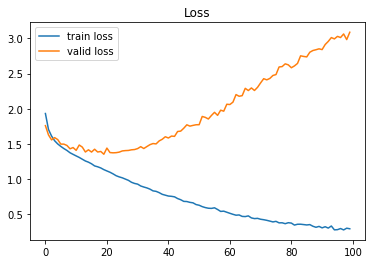

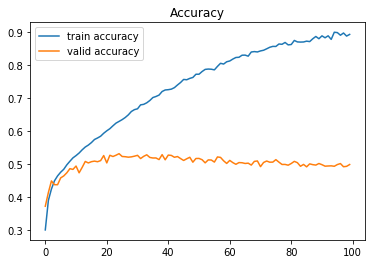

In [16]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()